In [1]:
import numpy as np
import math
from random import seed
from random import random
from numba import jit, prange

from functions import comp_shortest_path, read_tsp_file, read_data, TestResult

In [5]:
T_start = 1000
T_end = 0.005
cooling_factor = 0.99
nMarkov = 280
coords = read_tsp_file("TSP-Configurations/a280.tsp")


In [6]:
def loop(n, nmarkov=nMarkov):
    for i in range(n):
        itr, min_cost, optimal_list_cities, best_cost = comp_shortest_path(
            T_start, T_end, cooling_factor, nmarkov, coords, dataset="a280", save_data=True)
        
def loop_markov(nloop, nmarkov_list):
    for nmarkov in nmarkov_list:
        loop(nloop,nmarkov)
    
        
        
# loop_markov(2,[140, 280])

In [7]:
# # Done for array([  70,  140,  210,  280,  350,  420,  490,  560,  630,  700,  770, 840,  910,  980, 1050, 1120, 1190, 1260, 1330, 1400])

ncities = 280
step = int(ncities/4)
start = int(1470)
stop = int(ncities*10+step)
nmarkov_list = np.arange(start, stop, step, dtype=int)

# loop_markov(25, nmarkov_list)

In [34]:

# ncities = 280
# step = int(ncities/4)
# start = int(step)
# stop = int(ncities*10+step)
# nmarkov_list = np.arange(start, stop, step, dtype=int)

# loop_markov(10, nmarkov_list)

In [2]:
df = read_data()
headers = TestResult.headers()
df = df[df["Dataset"] == "a280"]

In [3]:
df.describe()


,Minimal Cost,iterations,Computation Time,Start Temperature,End Temperature,Cooling Factor,Markov Chain Length
count,500.000000,500.0,500.000000,500.0,500.000,5.000000e+02,500.000000
mean,2766.599844,1215.0,57.506597,1000.0,0.005,9.900000e-01,2135.000000
std,46.046483,0.0,25.728457,0.0,0.000,1.111335e-16,404.043937
min,2646.487621,1215.0,36.714292,1000.0,0.005,9.900000e-01,1470.000000
25%,2734.376174,1215.0,45.391518,1000.0,0.005,9.900000e-01,1802.500000
50%,2766.816040,1215.0,54.541573,1000.0,0.005,9.900000e-01,2135.000000
75%,2797.225599,1215.0,62.188729,1000.0,0.005,9.900000e-01,2467.500000
max,2926.907613,1215.0,225.115042,1000.0,0.005,9.900000e-01,2800.000000


In [30]:
nmarkov_list

array([  70,  140,  210,  280,  350,  420,  490,  560,  630,  700,  770,
        840,  910,  980, 1050, 1120, 1190, 1260, 1330, 1400])

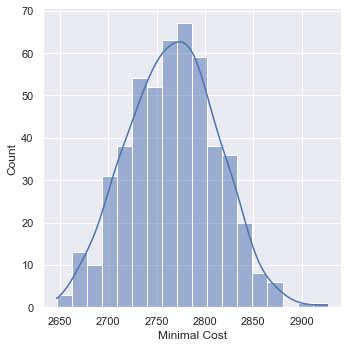

In [4]:
import seaborn as sns
sns.set_theme()
headers = TestResult.headers()
sns.displot(data=df[df[headers[6]] == 0.005], x=headers[0], kde=True)


<AxesSubplot:xlabel='Minimal Cost', ylabel='Markov Chain Length'>

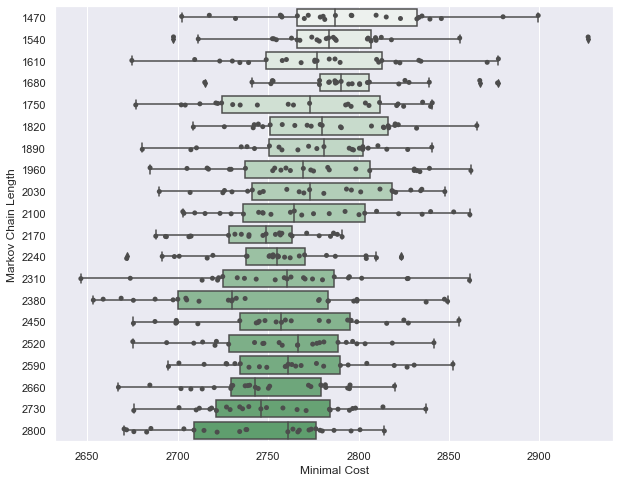

In [13]:
import matplotlib.pyplot as plt
sns.set_color_codes()

fig, ax = plt.subplots(1, 1, figsize=(10,8))
sns.boxplot(data=df[df[headers[9]] != 70], y=headers[9], x=headers[0], orient="h", ax=ax, palette="light:g")
sns.stripplot(data=df[df[headers[9]] != 70], y=headers[9], x=headers[0], orient="h", ax=ax, color=".3")
# plt.savefig("nmarkov_boxplot_cf=099_samples=25.pdf")


<AxesSubplot:xlabel='Computation Time', ylabel='Minimal Cost'>

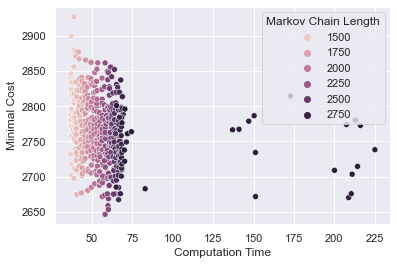

In [8]:

sns.scatterplot(data=df, x=headers[3], y=headers[0], hue=headers[9], hue_order=nmarkov_list)

In [9]:
df_nmarkov_grouped = df[df[headers[9]] != 70].groupby(headers[9])

In [10]:
df_nmarkov_grouped.describe()

Minimal Cost                                       \
                           count         mean        std          min   
Markov Chain Length                                                     
1470                        25.0  2794.604338  47.469049  2702.221670   
1540                        25.0  2786.845634  44.193979  2697.693616   
1610                        25.0  2781.166909  49.025891  2674.676650   
1680                        25.0  2794.049789  36.889618  2714.965563   
1750                        25.0  2770.313829  49.894698  2676.826298   
1820                        25.0  2783.852156  38.431068  2708.672453   
1890                        25.0  2774.795054  39.851227  2680.439411   
1960                        25.0  2772.916858  47.166414  2684.748778   
2030                        25.0  2776.306024  44.371037  2689.852215   
2100                        25.0  2771.297400  47.440514  2702.850430   
2170                        25.0  2744.597206  31.453557  2687.884536   
2240                        25.0  2752.705377  38.271936  2671.803662   
2310                        25.0  2758.394550  47.736002  2646.487621   
2380                        25.0  2742.915559  58.745064  2653.388110   
2450                        25.0  2759.640545  47.660669  2675.544526   
2520                        25.0  2759.933374  40.397008  2675.196979   
2590                        25.0  2764.701183  40.848974  2694.923072   
2660                        25.0  2747.269684  37.524609  2667.265547   
2730                        25.0  2752.401844  39.762987  2675.735632   
2800                        25.0  2743.289559  44.013647  2670.389829   

                                                                         \
                             25%          50%          75%          max   
Markov Chain Length                                                       
1470                 2766.179758  2787.211912  2832.239187  2899.317510   
1540                 2766.036721  2783.470073  2806.871872  2926.907613   
1610                 2748.944702  2777.048973  2812.855157  2877.293525   
1680                 2778.450581  2790.377297  2805.993292  2876.834226   
1750                 2724.305545  2772.928534  2811.609330  2840.739483   
1820                 2751.154908  2779.909776  2816.403295  2865.385707   
1890                 2750.749456  2780.867040  2802.305821  2840.478620   
1960                 2737.473078  2769.471203  2806.167086  2862.103582   
2030                 2741.293245  2772.942526  2818.514307  2847.694840   
2100                 2736.368292  2764.484080  2803.405328  2861.524428   
2170                 2728.117391  2748.859555  2763.263635  2790.915852   
2240                 2738.051527  2755.170738  2770.158139  2823.688524   
2310                 2724.932372  2760.502142  2786.570228  2861.367755   
2380                 2700.079895  2730.233588  2783.287512  2849.214884   
2450                 2734.347393  2757.377193  2795.226702  2855.492646   
2520                 2728.208294  2766.259337  2788.652375  2841.670137   
2590                 2734.637624  2761.134298  2789.969326  2852.166968   
2660                 2729.391615  2742.944365  2779.172880  2819.887115   
2730                 2721.437917  2745.987277  2784.308505  2837.139642   
2800                 2709.006442  2760.911230  2776.375708  2814.264336   

                    iterations          ... End Temperature         \
                         count    mean  ...             75%    max   
Markov Chain Length                     ...                          
1470                      25.0  1215.0  ...           0.005  0.005   
1540                      25.0  1215.0  ...           0.005  0.005   
1610                      25.0  1215.0  ...           0.005  0.005   
1680                      25.0  1215.0  ...           0.005  0.005   
1750                      25.0  1215.0  ...           0.005  0.005   
1820                      25.0  1215.0  ...           

In [ ]:
from functions import read_tsp_file, read_tsp_file_opt, total_dist, distance_matrix
coords = read_tsp_file("TSP-Configurations/a280.tsp")
opt_tour = read_tsp_file_opt("TSP-Configurations/a280.opt.tour.txt")

dist_matrix = distance_matrix(coords=coords)
optimal_tour_length = total_dist(opt_tour, dist_matrix)
print(optimal_tour_length)